In [385]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/w7_kaggle_competition/')

Mounted at /content/drive


In [386]:
from google.colab import files
# uploaded = files.upload()

In [387]:
%matplotlib inline
import re
import numpy as np
import pandas as pd

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

In [389]:
from sklearn import metrics

The goal of this projet is the prediction of the price of diamonds based on their characteristics (weight, color, quality of cut, etc.), putting into practice all the machine learning techniques you know.

### 1. Exploring the data sets

Features

*   id: only for test & sample submission files, id for prediction sample identification
*   price: price in USD
*   carat: weight of the diamond
*   cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color: diamond colour
*   clarity: a measurement of how clear the diamond is
*   x: length in mm
*   y: width in mm
*   z: depth in mm
*   depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table: width of top of diamond relative to widest point (43--95)




#### train.csv

Load the data file:

In [390]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/w7_kaggle_competition/data/train.csv')

In [391]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [392]:
# Data types
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [393]:
# Rows and columns
train.shape

(40455, 11)

In [394]:
# Handle Missing Values
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [395]:
# Column 'id' is removed to analyze the data
train.drop(columns=['id'], inplace=True)

Evaluation of the level of collinearity of the data.


*  Correlation matrix using the numeric columns of the data set.



In [396]:
corrMatrix = train.corr()
corrMatrix

,carat,depth,table,x,y,z,price
carat,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
depth,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


*  Heat map using seaborn to visualize which columns have high collinearity.

In [397]:
corrMatrix.style.background_gradient(cmap='coolwarm') 

,carat,depth,table,x,y,z,price
carat,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
depth,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

x, y, z --> have high collinearity whit --> carat, price

### 2. Remove Column Collinearity.

In [398]:
# We proceed to eliminate the columns with red collinearity
# train.drop(columns=['x', 'y', 'z'], inplace=True)
# train.drop(columns=['depth'], inplace=True)

In [399]:
train.shape

(40455, 10)

In [400]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,carat,depth,table,x,y,z,price
carat,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
depth,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


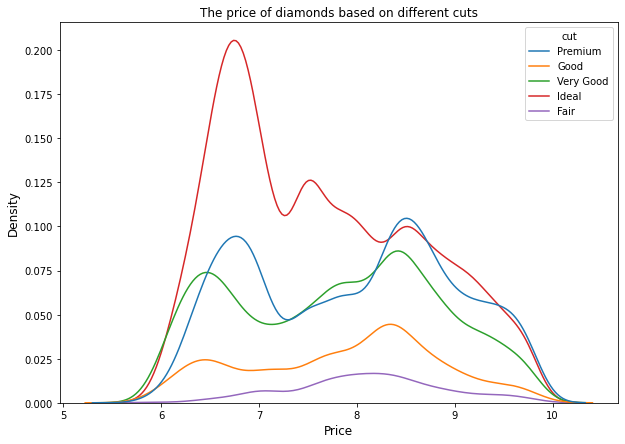

In [401]:
plt.figure(figsize = (10,7))
sns.kdeplot(x = "price", data = train, hue = "cut")
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("The price of diamonds based on different cuts")
plt.show();

### 3. Handle Categorical Data

There are several categorical columns we need to handle. These columns are:

*  cut
*  color
*  clarity

Let's start by working on "cut"

In [402]:
# Show unique values
train["cut"].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

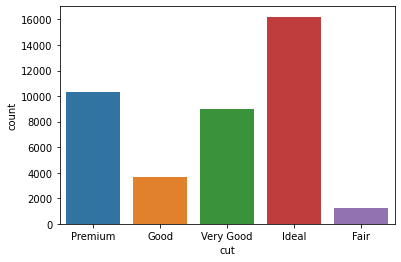

In [403]:
sns.countplot(x=train.cut)
plt.show()


We do the same job with "color"

In [404]:
# Show unique values
train["color"].unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

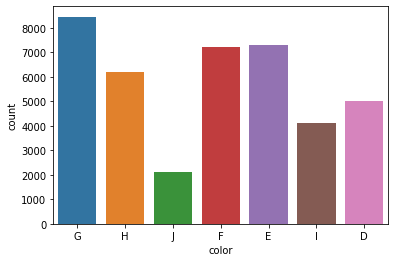

In [405]:
sns.countplot(x=train.color)
plt.show()


We continue with "clarity"

In [406]:
# Show unique values
train["clarity"].unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

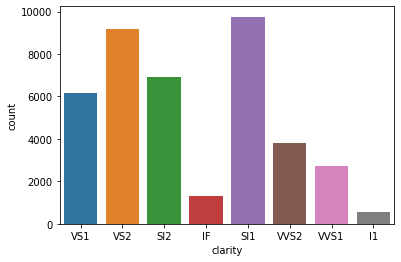

In [407]:
sns.countplot(x=train.clarity)
plt.show()

We confirm that they all have consistent codes

### 4. Handle categorical data and convert it to ordinal

Let's convert them to ordinal data using Pandas' get_dummies

In [408]:
# Data types
train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [409]:
train_dummy = pd.get_dummies(train, columns=["cut", "color", "clarity"], drop_first=True)
train_dummy.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [410]:
# from sklearn.decomposition import PCA
# from sklearn.decomposition import KernelPCA
# #pca = PCA(n_components=25)
# pca = KernelPCA(kernel='linear', gamma=0.02)
# train_mod = pca.fit_transform(train_dummy)
# print(train_mod.shape)
train_dummy

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.51,62.5,55.0,5.08,5.13,3.19,7.412,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
40451,0.80,62.1,54.0,5.96,5.99,3.71,8.016,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
40452,1.53,58.7,59.0,7.51,7.45,4.39,9.070,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
40453,1.51,61.6,54.0,7.38,7.42,4.57,9.199,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [411]:
train_dummy.shape

(40455, 24)

In [412]:
train_dummy.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

### 4. Modeling, Prediction, and Evaluation

In [413]:
X = train_dummy.drop(columns=["price"],axis=1)
y = train_dummy["price"]

In [414]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=10)

In [415]:
X_train.shape

(36409, 23)

In [416]:
X_test.shape

(4046, 23)

We will try some different models and compare our results

In [417]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import pickle

In [418]:
# We store all the models that we are going to train in a dictionary
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150, random_state=11),
          # "Support Vector": SVR(C=1.0, epsilon=0.2),
          # 'DecisionTree': DecisionTreeRegressor(max_depth=30, random_state=42),
          # 'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=20, random_state=42),
          # 'poly': make_pipeline(PolynomialFeatures(3),LinearRegression()),
          # 'passive_aggressive': PassiveAggressiveRegressor(max_iter=100, random_state=1, C=0.05),
          # 'MLP': MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(30, 100, 80,10))
} 

In [419]:

model = GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150, random_state=11)
model.fit(X, y)
pickle.dump(model, open('gradient_all.pkl', 'wb'))


In [420]:
# We iterate on the models to train them
for name, model in models.items():
    print(f"Training model ---> {name}")
    model.fit(X_train, y_train)
    filename = name + '.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print(f"OK")

Training model ---> ridge
OK
Training model ---> lasso
OK
Training model ---> sgd
OK
Training model ---> knn
OK
Training model ---> gradient
OK


In [421]:
# We iterate on the models to load them
for name, model in models.items():
    print(f"Loading model ---> {name}")
    filename = name + '.pkl'
    models[name] = pickle.load(open(filename, 'rb'))
    print(f"OK")

Loading model ---> ridge
OK
Loading model ---> lasso
OK
Loading model ---> sgd
OK
Loading model ---> knn
OK
Loading model ---> gradient
OK


In [422]:
# Get predictions of each algorithm and its metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ", metrics.r2_score(y_test,y_pred))
    print("\n")

--------ridge--------
MAE:  0.11110703508496542
MSE:  0.03421193017880078
RMSE:  0.18496467278591547
R2:  0.9664299615340193


--------lasso--------
MAE:  0.7971006015663207
MSE:  0.861387896053655
RMSE:  0.9281098512857489
R2:  0.15477365195344928


--------sgd--------
MAE:  58414749.127095416
MSE:  4.865882485260737e+16
RMSE:  220587453.9782518
R2:  -4.77458773437934e+16


--------knn--------
MAE:  0.14019930795847751
MSE:  0.03624786091942659
RMSE:  0.19038871006293043
R2:  0.9644322293710083


--------gradient--------
MAE:  0.06518673470337312
MSE:  0.008123020402514726
RMSE:  0.09012780038653294
R2:  0.9920293854819879




In [423]:
best_model = models['gradient']
y_pred = best_model.predict(X)
print(f"--------{name}--------")
print("MAE: ", metrics.mean_absolute_error(y, y_pred))
print("MSE: ", metrics.mean_squared_error(y, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y,y_pred)))
print("R2: ", metrics.r2_score(y,y_pred))
print("\n")

--------gradient--------
MAE:  0.053551913370047326
MSE:  0.005440222663372308
RMSE:  0.0737578650950006
R2:  0.994735860762611




### 4. Cross-Validation

In [424]:
from sklearn.model_selection import cross_val_score

In [425]:
# for name, model in models.items():
#     scores = cross_val_score(model, X_train, y_train, scoring = "r2", cv=5)
#     print(f"{name} r2 {np.mean(scores)}" )

test.csv

Load the data file:

In [426]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/w7_kaggle_competition/data/test.csv')

In [427]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36


In [428]:
# Data types
test.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [429]:
# Rows and columns
test.shape

(13485, 10)

In [430]:
# Handle Missing Values
test.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [431]:
Id = test[['id']]
Id

,id
0,0
1,1
2,2
3,3
4,4
...,...
13480,13480
13481,13481
13482,13482
13483,13483


In [432]:
# Column 'id' is removed to analyze the data
test.drop(columns=['id'], inplace=True)

### 2. Remove Column Collinearity.

In [433]:
# We proceed to eliminate the columns with red collinearity
# test.drop(columns=['depth'], inplace=True)

In [434]:
test.shape

(13485, 9)

### 3. Handle Categorical Data

In [435]:
# Show unique values
test["cut"].unique()

array(['Ideal', 'Good', 'Premium', 'Very Good', 'Fair'], dtype=object)

In [436]:
# Show unique values
test["color"].unique()

array(['H', 'D', 'F', 'E', 'G', 'I', 'J'], dtype=object)

In [437]:
# Show unique values
test["clarity"].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS1', 'IF', 'VVS2', 'I1'],
      dtype=object)

We confirm that they all have consistent codes

### 4. Handle categorical data and convert it to ordinal

Let's convert them to ordinal data using Pandas' get_dummies

In [438]:
# Data types
test.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [439]:
test_dummy = pd.get_dummies(test, columns=["cut", "color", "clarity"], drop_first=True)
test_dummy.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.01,61.9,57.0,8.14,8.05,5.01,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.49,57.5,60.0,5.18,5.25,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.03,58.6,62.0,6.65,6.60,3.88,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.90,63.0,56.0,6.11,6.15,3.86,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0.59,62.5,55.0,5.35,5.40,3.36,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [440]:
test_dummy.shape

(13485, 23)

In [441]:
test_dummy.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

### 4. Modeling, Prediction, and Evaluation

In [442]:
X = test_dummy

In [443]:
model = pickle.load(open('gradient.pkl', 'rb'))

In [444]:
y_pred = model.predict(X)

In [445]:
# model_all = pickle.load(open('gradient_all.pkl', 'rb'))

In [446]:
# y_pred = model_all.predict(X)

In [447]:
y_pred

array([9.70088815, 7.31921306, 8.49999996, ..., 9.71250381, 7.04941653,
       7.15122404])

In [448]:
test_dummy['price'] = y_pred

In [449]:
test_dummy.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,2.01,61.9,57.0,8.14,8.05,5.01,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,9.700888
1,0.49,57.5,60.0,5.18,5.25,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.319213
2,1.03,58.6,62.0,6.65,6.60,3.88,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,8.500000
3,0.90,63.0,56.0,6.11,6.15,3.86,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,8.348129
4,0.59,62.5,55.0,5.35,5.40,3.36,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.486409


In [450]:
test_dummy = pd.concat([Id,test_dummy], axis=1)

In [451]:
test_dummy = test_dummy[['id', 'price']]

In [452]:
test_dummy

,id,price
0,0,9.700888
1,1,7.319213
2,2,8.500000
3,3,8.348129
4,4,7.486409
...,...,...
13480,13480,6.511336
13481,13481,9.604612
13482,13482,9.712504
13483,13483,7.049417


In [453]:
test_dummy.shape

(13485, 2)

In [384]:
# Exportar dataset 
# test_dummy.to_csv("drive/MyDrive/Colab Notebooks/w7_kaggle_competition/data/submission.csv", index = False, encoding="ISO-8859-1")